## Para gerar os dados Executar o arquivo data.py

## As funções uteis estão no arquivo fuction.py

In [1]:
from torch.optim.lr_scheduler import StepLR
from fuction import *

import matplotlib.pyplot as plt
import numpy     as np
import PIL.Image as Image
import torch     as tc
import torch.nn as nn
import torch.nn.functional as F

Epoch [1/200] , Loss: 0.0212
Epoch [21/200] , Loss: 0.0149
Epoch [41/200] , Loss: 0.0100
Epoch [61/200] , Loss: 0.0077
Epoch [81/200] , Loss: 0.0034
Epoch [101/200] , Loss: 0.0033
Epoch [121/200] , Loss: 0.0027
Epoch [141/200] , Loss: 0.0015
Epoch [161/200] , Loss: 0.0006
Epoch [181/200] , Loss: 0.0004
Treinamento concluído


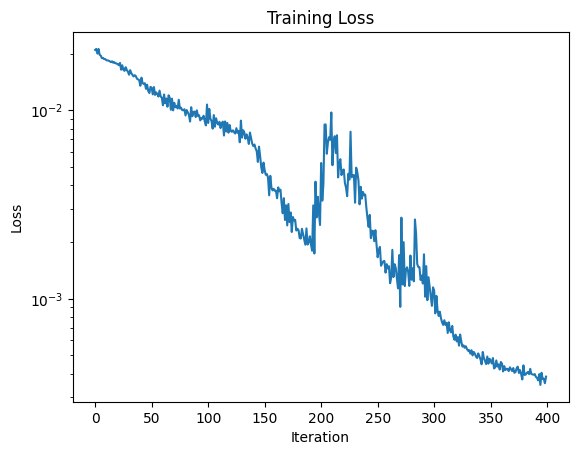

In [2]:
# Caminho para o diretório das imagens
root_dir = 'data_pendulo'  # Ajuste para o diretório onde suas imagens estão salvas

# DataLoader
batch_size = 15
dataset = CustomImageDataset(root_dir)
model = SimpleAutoencoder(neck=2)  # Ajuste o parâmetro 'neck' conforme necessário

trainer = Trainer(model, dataset, batch_size=batch_size)
trainer.train(epochs=200)

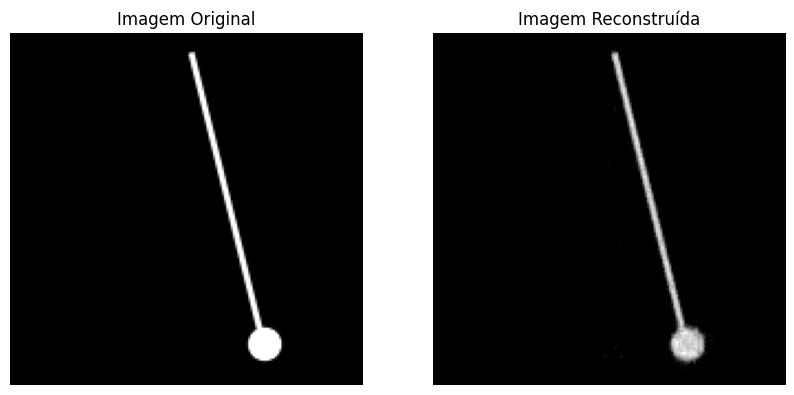

In [3]:
trainer.model.eval()  # Coloca o modelo em modo de avaliação

# Supondo que você quer testar com a primeira imagem do dataset
dataiter = iter(trainer.dataloader)
images = next(dataiter)
# Executar a imagem pela rede
output,output2 = trainer.model(images[0].unsqueeze(0))

# Converte a saída do modelo e a entrada para exibição
output = output.cpu().detach().numpy().squeeze()
input_image = images[0].cpu().detach().numpy().squeeze()

# Plotando as imagens
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title('Imagem Original')
ax[0].axis('off')
ax[1].imshow(output, cmap='gray')
ax[1].set_title('Imagem Reconstruída')
ax[1].axis('off')
plt.show()
